In [4]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

 
data = pd.read_csv('/Users/juanhuml/Desktop/spread_data.csv')
spread_pred = pd.read_csv('/Users/juanhuml/Desktop/spread_pred.csv')
X_to_predict = spread_pred.iloc[:,:-1]
X, y = data.iloc[:,:-1],data.iloc[:,-1]

data_dmatrix = xgb.DMatrix(data=X,label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 2, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 17.491544


/Users/juanhuml/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/juanhuml/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [6]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=420)
cv_results.head()

predicted_spreads = xg_reg.predict(X_to_predict)
predicted_spreads

array([ 11.999347  ,   5.5191464 ,   2.7888715 ,  -3.3606477 ,
        -4.793526  ,  -0.6091572 ,   5.5716224 ,  -3.0506978 ,
         5.5716224 ,  10.267571  ,   6.9515104 ,  -0.65725005,
         6.9238787 ,   6.9238787 ,  -3.7906885 , -10.785497  ,
         1.1880041 ,  12.300525  , -10.785497  ,  -4.793526  ,
        -4.793526  ,  -7.826906  ], dtype=float32)

In [7]:
print((cv_results["test-rmse-mean"]).tail(1))

38    15.403639
Name: test-rmse-mean, dtype: float64


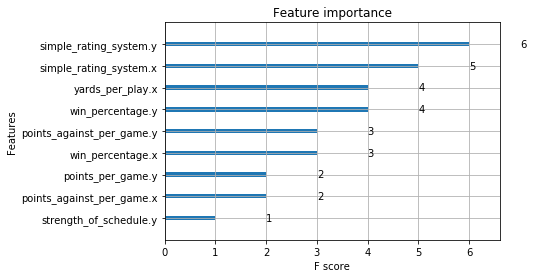

In [9]:
import matplotlib.pyplot as plt

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [3, 3]
plt.show()

In [10]:
total_data = pd.read_csv('/Users/juanhuml/Desktop/wide_spread.csv')
points_pred = pd.read_csv('/Users/juanhuml/Desktop/points_pred.csv')
X_tot_to_predict = points_pred.iloc[:,:-1]
X, y = total_data.iloc[:,:-1],total_data.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.20,
                max_depth = 2, alpha = 10, n_estimators = 9)
xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_test)

mae = mean_absolute_error(y_test, preds)
print("mae: %f" % (mae))
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="mae", as_pandas=True, seed=420)
#cv_results.head()
print((cv_results["test-mae-mean"]).tail(1))

total_preds = xg_reg.predict(X_tot_to_predict)
total_preds

mae: 15.131182
36    13.453121
Name: test-mae-mean, dtype: float64


/Users/juanhuml/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/juanhuml/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


array([48.350163, 46.303387, 38.370277, 42.470943, 49.377617, 40.74315 ,
       52.12188 , 36.824203, 45.33053 , 56.613384, 36.839302, 41.377342,
       49.88101 , 45.053913, 46.205982, 46.715855, 43.326122, 46.61319 ,
       43.62889 , 54.159443, 35.70022 , 51.893467], dtype=float32)